In [56]:
import matplotlib.pyplot as plt

import random
import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2

from IPython.display import clear_output, display
import os.path
from os import path
import shutil
from shutil import copyfile
from pathlib import Path
import PIL

In [32]:
from PIL import Image, ImageOps

In [13]:
files = glob( 'C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila/*')

In [14]:
len( files)

180

In [136]:
def write_image( path, img):
  cv2.imwrite( path, img)

In [16]:
for f in files:
    print( f)

C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan.jpg
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0851.jpg
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0852.jpg
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0853.jpg
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0854.jpg
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0855.jpg
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0856.jpg
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0857.jpg
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0858.jpg
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0860.jpg
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0862.jpg
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0863.jpg
C:/mestrado/originais/score_sheet/irt_hebrai

In [17]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

In [19]:
labels = read_label( 'C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila/_all-labels.txt')

In [23]:
with open('C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila/_all-labels.txt') as f:
    lines = [line.rstrip() for line in f]

In [25]:
len( lines)

180

In [31]:
dest_dir= "C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/dataset/"
count = 1
for image, label in zip( files, lines):
    fname = 'irt_hebraica_jan2020_'+ str( count).zfill( 3)
    count = count+1
    
    print( image, label, ' =>', fname)
    
    img_file= os.path.join( dest_dir, "images", fname+ '.jpg')
    shutil.copyfile( image, img_file)
    
    write_label( img_file.replace( 'images', 'labels').replace( 'jpg', 'pgn'), label)

C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan.jpg e4 c5 Nf3 e6  => irt_hebraica_jan2020_001
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0851.jpg e4 e5 Nf3 e6  => irt_hebraica_jan2020_002
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0852.jpg e4 e5 Nf3 Nc6  => irt_hebraica_jan2020_003
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0853.jpg e4 e5 Nf3 Nc6  => irt_hebraica_jan2020_004
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0854.jpg d4 Nf6 Nf3 g6  => irt_hebraica_jan2020_005
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0855.jpg d4 Nf6 Nf3 g6  => irt_hebraica_jan2020_006
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0856.jpg e4 e5 Bc4 d6  => irt_hebraica_jan2020_007
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan0857.jpg e4 e5 Bc4 d6  => irt_hebraica_jan2020_008
C:/mestrado/originais/sc

C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan1044.jpg d4 Nf6 Nf3 c5  => irt_hebraica_jan2020_116
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan1046.jpg d4 Nf6 c4 g6e  => irt_hebraica_jan2020_117
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan1047.jpg e4 e5 Bc4 Nf6  => irt_hebraica_jan2020_118
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan1048.jpg c4 Nf6 Nc3 d6  => irt_hebraica_jan2020_119
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan1049.jpg c4 Nf6 Nc3 d6  => irt_hebraica_jan2020_120
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan1050.jpg e4 c5 c3 g6  => irt_hebraica_jan2020_121
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan1051.jpg d4 Nf6 Bf4 e6  => irt_hebraica_jan2020_122
C:/mestrado/originais/score_sheet/irt_hebraica_jan2020/images/fila\scan1053.jpg e4 e5 d4 d5  => irt_hebraica_jan2020_123
C:/mestrado/originai

In [28]:
count = 10
str( count).zfill( 3)

'010'

In [41]:
def resize_with_padding(img, expected_size):
    img.thumbnail((expected_size[0], expected_size[1]))
    # print(img.size)
    delta_width = expected_size[0] - img.size[0]
    delta_height = expected_size[1] - img.size[1]
    pad_width = delta_width // 2
    pad_height = delta_height // 2
    padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
    return ImageOps.expand(img, padding)


In [34]:
img = Image.open( "C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/app/sample_data/irt_hebraica_jan2020_001.jpg")
               

In [35]:
img.show()

In [38]:
def show( img):
    plt.imshow( np.array( img))
    plt.show()

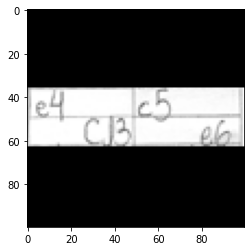

In [42]:
show( resize_with_padding( img, (100, 100)))

In [43]:
def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

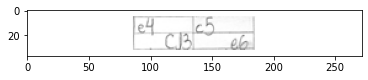

In [47]:
dy = int( (862-689)/2)
dx = int( (200-189)/2)

show( add_margin( img, dx, dy, dx, dy, (255, 255, 255)))

In [48]:
show(  Image.open("C:/mestrado/datasets/syn/template/template-2x.jpg"))

FileNotFoundError: [Errno 2] No such file or directory: 'C:/mestrado/datasets/syn/template/template-2x.jpg'

In [127]:
img = Image.open( 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/app/sample_data/irt_hebraica_jan2020_001.jpg')

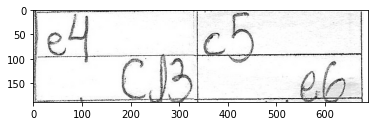

In [52]:
show( img)

In [126]:
left = Image.open( 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/app/sample_data/_left.jpg')
right = Image.open( 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/app/sample_data/_right.jpg')

In [57]:
# ndimag = PIL.Image.fromarray(np.uint8(img))

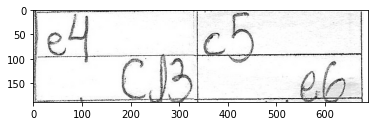

In [59]:
# plt.imshow( ndimag)
# plt.show()

In [128]:
ndimg= np.asarray( img)
ndleft= np.asarray( left)
ndright= np.asarray( right)

In [129]:
ndimg.shape

(189, 689, 3)

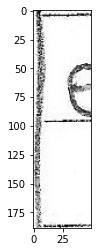

In [104]:
show( ndimg[:ndleft.shape[0], :ndleft.shape[1], :ndleft.shape[2]] )

In [112]:
ndleft.shape[0]

193

In [114]:
h = min( ndleft.shape[0], ndimg.shape[0])
print( h)

189


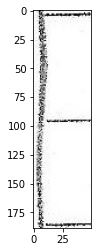

In [115]:
show( ndleft[:h])

(189, 813, 3)


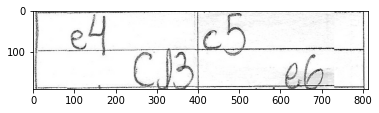

In [130]:
dx = 20
newndimg = np.concatenate( (ndleft[:h], ndimg[:h,dx:ndimg.shape[1]-dx], ndright[:h]), axis=1)
print( newndimg.shape)
show( newndimg)

In [131]:
def resize( img, width, height):
    img= cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA) 
    return img


In [134]:
img2 = resize( newndimg, 862, 200)

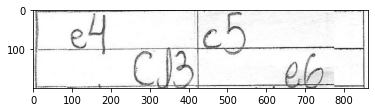

In [135]:
show( img2)

In [137]:
write_image( 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/app/sample_data/new_img.jpg', img2)

In [ ]:
np.asarray( img)[]

In [85]:
z= np.zeros( (5,5,))
z

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [94]:
z= np.zeros( (5,4))
print( 'z', z)
v = np.ones((2,3))
print( 'v', v)
z[0:v.shape[0], 0:v.shape[1]]= v 
print( 'zv' ,z)

z [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
v [[1. 1. 1.]
 [1. 1. 1.]]
zv [[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [78]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [83]:
z[0:2, :]

array([[0.],
       [0.]])

In [138]:
images = glob( 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/test-data/irt_hebraica_jan2020-2/images/*.jpg' ) 

left = Image.open( 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/app/sample_data/_left.jpg')
right = Image.open( 'C:/mestrado/repos-github/chess-attention/trained--for-evaluation/notebooks/app/sample_data/_right.jpg')

left= np.asarray( left)
right= np.asarray( right)

for f in images:
	img = Image.open( f)
	img= np.asarray( img)
	dx = 20
	h = min( ndleft.shape[0], img.shape[0])
	img = np.concatenate( (left[:h], img[:h,dx:img.shape[1]-dx], right[:h]), axis=1)
	img = resize( img, 862, 200) 
	write_image( f, img)